In [2]:
import tensorflow as tf


from ipywidgets import interact, interactive
import os
import numpy as np
import sys
import timeit
import csv
sys.path.append('/Users/zhouji/Google Drive/RWTH/GP_old')

import matplotlib.pyplot as plt

import gempy as gp
from gempy.core.tensor.tensorflow_graph_test import TFGraph
import tensorflow as tf
import tensorflow_probability as tfp
import pandas as pd
from gempy import create_data, map_series_to_surfaces
from gempy.assets.geophysics import GravityPreprocessing
tfd = tfp.distributions
%matplotlib inline

In [3]:
geo_model = gp.create_model('Fold')

path = '/Users/zhouji/Google Drive/RWTH/GP_old/notebooks/'
# set regular grid to low resolution to save memory

gp.init_data(geo_model, [0, 1000., 0, 1000., 0, 1000.], [50, 50, 50],
                 path_o=path+ "/data/input_data/George_models/model2_1_orientations.csv",
                  path_i=path + "/data/input_data/George_models/180surface_points.csv",
             default_values=True)

gp.map_stack_to_surfaces(geo_model,
                        {"Strat_Series": (
    'rock2', 'rock1'), "Basement_Series": ('basement')},
                         remove_unused_series=True)

# geo_data = create_data([0, 1000, 0, 1000, 0, 1000], resolution=[50, 50, 50],
#                       path_o=path+ "/data/input_data/George_models/model2_1_orientations.csv",
#                       path_i=path + "/data/input_data/George_models/180surface_points.csv")
# map_series_to_surfaces(geo_data, {"Strat_Series": (
#     'rock2', 'rock1'), "Basement_Series": ('basement')})

Active grids: ['regular']


,surface,series,order_surfaces,color,id
0,rock1,Strat_Series,1,#015482,1
1,rock2,Strat_Series,2,#9f0052,2
2,basement,Basement_Series,1,#ffbe00,3


In [ ]:
geo_model.

In [4]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1732.05
$C_o$            71428.6
drift equations   [3, 3]


In [5]:
sol = gp.compute_model(geo_model)

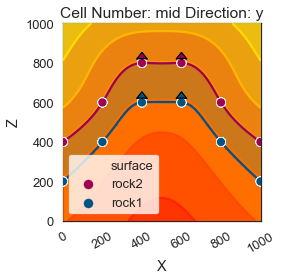

In [18]:
gp.plot_2d(geo_model,show_scalar = True)

In [7]:
gp.plot_3d(geo_model,show_results = False, show_lith=False,notebook=False)

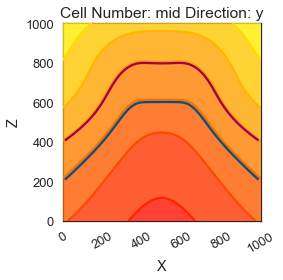

In [12]:
gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
plt.show()

In [26]:
geo_model.solutions.scalar_field_matrix

array([[0.30904089, 0.3216565 , 0.33439962, ..., 0.96598476, 0.9778604 ,
        0.98998304]])

In [37]:
## surface data
GP = gp.plot_3d(geo_model,show_lith = False,show_surfaces=False, notebook=False)

In [36]:
## scalar field
GP = gp.plot_3d(geo_model,show_scalar = True,show_lith = False,show_surfaces=False, notebook=False,scalar_field = 'Strat_Series')

In [31]:
import pyvista as pv

grav_res_x = 7
grav_res_y = 7
X = np.linspace(0, 1000, grav_res_x)
Y = np.linspace(0, 1000, grav_res_y)
Z = 1000
xyz = np.meshgrid(X, Y, Z)
xy_ravel = np.vstack(list(map(np.ravel, xyz))).T

In [32]:
poly = pv.PolyData(xy_ravel)
geom = pv.Cone(direction=[0.0, 0.0, -1.0])

In [33]:
glyphs = poly.glyph(factor=30.0,geom=geom)

In [35]:
GP = gp.plot_3d(geo_model, show_surfaces=True, notebook=False,off_screen=True)

GP.p.add_mesh(glyphs, color="tan",render_points_as_spheres=True,point_size=10)
GP.set_bounds()

# GP.p.add_mesh(poly, color="tan",render_points_as_spheres=True,point_size=10)
GP.p.show()

[(1924.7864321203776, 3419.8567665749338, 1592.4412880124255),
 (499.9999876022339, 500.0, 507.5),
 (-0.13152187012934577, -0.2882517256286094, 0.9484792777651014)]

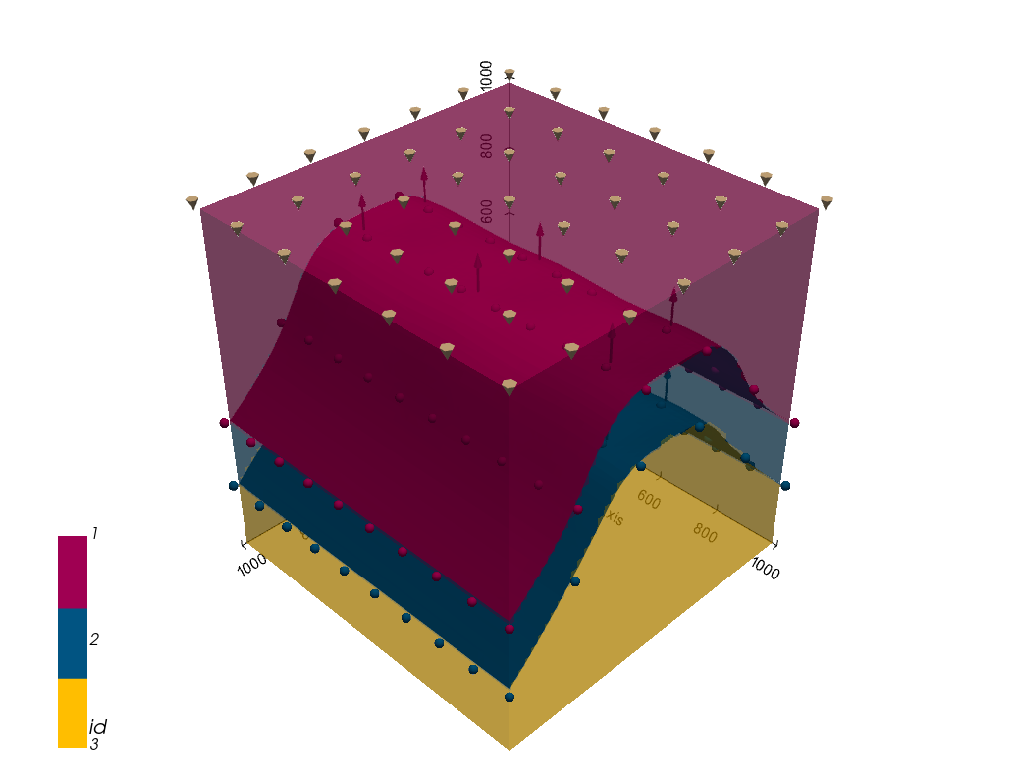

In [13]:
fig, ax = plt.subplots(figsize=(18, 14))
ax.imshow(GP.p.image,interpolation='nearest',aspect='auto')
plt.axis('off')
plt.savefig('/Users/zhouji/Documents/IRTG/IRTG2020/Poster_IRTG_2020/figs/3D_block.png')

In [ ]:
# fig, ax = plt.subplots(figsize=(18, 14))
# ax.imshow(pv.p.image,interpolation='nearest',aspect='auto')
# plt.axis('off')
# plt.savefig('/Users/zhouji/Documents/Presentations/IRTG 2020/Poster_IRTG_2020/figs/3D_block.png')

In [ ]:
fig, ax = plt.subplots(figsize=[6, 6])
rec = ax.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=10, zorder=1,label = 'Receivers')
ax.legend([rec],['Receivers'],loc='center left', bbox_to_anchor=(1.3, 0.5))

In [ ]:
xy_ravel